# **DSCI 100 Team 11 Project Report: Classifying students' knowledge level of Electrical DC Machines based on the relationship between PEG and LPR**

## Introduction

An ***Electrical Direct Current (DC) Machine*** can be classified as a DC motor or a DC generator, and it is responsible for altering electromechanical energy depending on the type of machine it is. For example, a DC motor will convert DC electrical power to mechanical power, while a DC generator will do the opposite. DC machines are used in trains, mills, and mines (Agarwal, 2020).

By method of K-nearest neighbours classification ***(KNN)***, using a dataset about students' knowledge on the subject of Electrical DC Machines, we will answer the question of ***how the knowledge level on Electrical DC Machines of a user is classified based on two predictors:*** ***PEG***, exam performance of the user for goal objects (knowledge on Electrical DC Machines), and ***LPR***, exam performance of the user for related objects (knowledge on subjects related to Electrical DC Machines) with the goal object (Kahraman et al., 2013).

This dataset is a csv file that has been ***split*** into a training and testing dataset by the author themselves. Using this split, we will ***assign*** it as our training data and testing data, respectively. There are 5 predictors: STG (degree of study time for goal object materials), SCG (degree of repetition number of user for goal object materials), STR (degree of study time of user for related objects with goal object), ***LPR***, and ***PEG***, and ***one response variable, UNS*** (knowledge level on Electrical DC Machines of the user), which includes ***4 different categories: “Very Low”, “Low”, “Middle”, and “High”*** (Kahraman et al., 2013).

## Methods and Results

Reading our dataset into R.

In [1]:
# Setting seed for the project
set.seed(2)

# Loading test and training sets into separate dataframes (they have already been separated by the dataset authors)

install.packages("themis")

library(tidyverse)
library(readxl)
library(repr)
library(tidymodels)
library(themis)
library(GGally)

train_url <- 'https://raw.githubusercontent.com/miketham24/team-11-dsci-100-project/main/data/Data_User_Modeling_Dataset_Hamdi-Tolga-KAHRAMAN_training.csv'
train_path <- 'data/user_knowledge_train.csv'
download.file(train_url, train_path)
uk_train <- read_csv(train_path) |>
    select(-...7, -...8, -'Attribute Information:') # this will be our training data

test_url <- 'https://raw.githubusercontent.com/miketham24/team-11-dsci-100-project/main/data/Data_User_Modeling_Dataset_Hamdi-Tolga-KAHRAMAN_testing.csv'
test_path <- 'data/user_knowledge_test.csv'
download.file(test_url, test_path)
uk_test <- read_csv(test_path) |>
    select(-...7, -...8, -'Attribute Information:') # and this will be our testing data

head(uk_train)
head(uk_test)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes     

STG  SCG  STR  LPR  PEG  UNS     
1 0.00 0.00 0.00 0.00 0.00 very_low
2 0.08 0.08 0.10 0.24 0.90 High    
3 0.06 0.06 0.05 0.25 0.33 Low     
4 0.10 0.10 0.15 0.65 0.30 Middle  
5 0.08 0.08 0.08 0.98 0.24 Low     
6 0.09 0.15 0.40 0.10 0.66 Middle

STG  SCG  STR  LPR  PEG  UNS     
1 0.00 0.10 0.50 0.26 0.05 Very Low
2 0.05 0.05 0.55 0.60 0.14 Low     
3 0.08 0.18 0.63 0.60 0.85 High    
4 0.20 0.20 0.68 0.67 0.85 High    
5 0.22 0.22 0.90 0.30 0.90 High    
6 0.14 0.14 0.70 0.50 0.30 Low

Our data is already mostly tidied: each of the cell values occurs only once, each vector represents one variable, and each row one observation. All numerical vectors are `<dbl>`.

In [2]:
# There are still a few things we can do to tidy our data

uk_train_scaled <- uk_train |>
    mutate(UNS = as_factor(UNS)) |>   # Here we convert USN from <chr> to <fct>
    mutate(UNS = fct_recode(UNS, "Very Low" = "very_low")) |>   # Now we standardize UNS class names between testing and training sets
    mutate(STG = scale(STG),   # And finally scale our numerical data
           SCG = scale(SCG),
           STR = scale(STR),
           LPR = scale(LPR),
           PEG = scale(PEG))

uk_test_scaled <- uk_test |>
    mutate(UNS = as_factor(UNS)) |>   # We also want to convert UNS to <fct> with our testing data
    mutate(STG = scale(STG),   # As well as scale the test numerical data
           SCG = scale(SCG),
           STR = scale(STR),
           LPR = scale(LPR),
           PEG = scale(PEG))

head(uk_train_scaled)
head(uk_test_scaled)

STG       SCG        STR        LPR        PEG        UNS     
1 -1.765089 -1.6780077 -1.9029207 -1.7440515 -1.7967053 Very Low
2 -1.384627 -1.3005822 -1.4963171 -0.7767309  1.7297900 High    
3 -1.479743 -1.3949386 -1.6996189 -0.7364259 -0.5036570 Low     
4 -1.289512 -1.2062258 -1.2930153  0.8757751 -0.6212069 Middle  
5 -1.384627 -1.3005822 -1.5776378  2.2058409 -0.8563066 Low     
6 -1.337070 -0.9703348 -0.2765062 -1.3410013  0.7893912 Middle

STG        SCG        STR       LPR        PEG        UNS     
1 -1.5142778 -1.1525157 0.2452099 -0.6155307 -1.4020025 Very Low
2 -1.2784849 -1.3772532 0.4470002  0.6235230 -1.0884978 Low     
3 -1.1370092 -0.7929358 0.7698645  0.6235230  1.3847057 High    
4 -0.5711065 -0.7030408 0.9716548  0.8786222  1.3847057 High    
5 -0.4767893 -0.6131458 1.8595318 -0.4697597  1.5588750 High    
6 -0.8540579 -0.9727257 1.0523709  0.2590954 -0.5311562 Low

Creating training data summary statistic tables.

In [3]:
# table_1 counts the number of observations in each UNS class
table_1 <- uk_train_scaled |>
    group_by(UNS) |>
    count() |>
    rename(count = n)
table_1

# table_2 gives us the minimum, maximum and mean of each numerical variable
table_2 <- uk_train_scaled |>
    summarize(across(where(is.numeric), .fns =
                     list(minimum = min,
                          maximum = max,
                          mean = mean))) |>
    pivot_longer(cols = everything(),
               names_sep = '_',
               names_to = c('.value', 'variable'))
table_2

UNS      count
1 Very Low 24   
2 High     63   
3 Low      83   
4 Middle   88

variable STG           SCG           STR           LPR          
1 minimum  -1.765089e+00 -1.678008e+00 -1.902921e+00 -1.744052e+00
2 maximum   2.943117e+00  2.568030e+00  1.959814e+00  2.246146e+00
3 mean     -8.605035e-17  5.559184e-17  7.350975e-17  1.052412e-16
  PEG          
1 -1.796705e+00
2  1.847340e+00
3  6.393977e-17

In [4]:
# Making a pairplot between all the variables in our data set to visualize the strength of the relationships between them
# which may help us to choose which variables to use in our analysis.

options(repr.plot.height = 7, repr.plot.width = 10)

# uk_pairplot <- uk_train_scaled |> 
# ggpairs(
# #lower = list(continuous = wrap('points', alpha = 0.4))
# #diag = list(continuous = "barDiag")
# ) +
# theme(text = element_text(size = 20))
# uk_pairplot

Making some scatterplots to determine what variables are most viable as predictors for `UNS`.

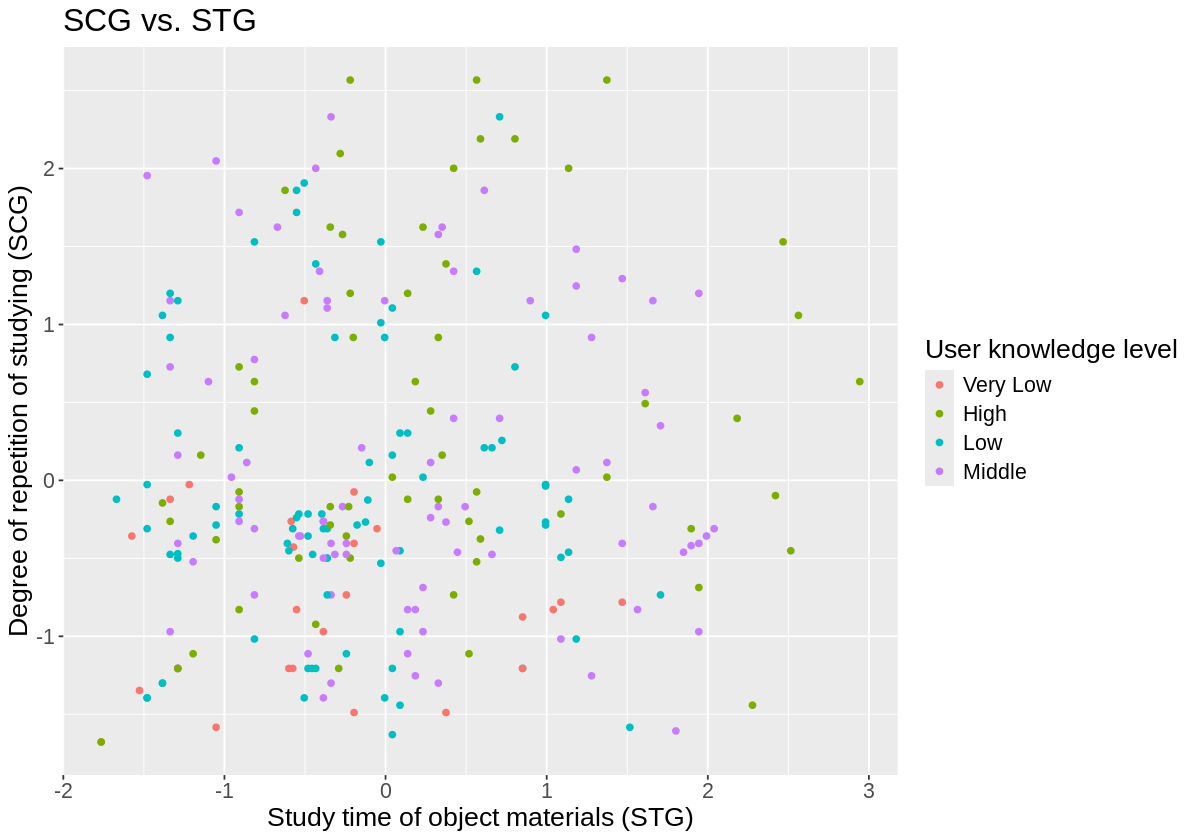

In [5]:
# Scatterplot visualizing relationships of SCG, STG and UNS in the scaled training data

options(repr.plot.height = 7, repr.plot.width = 10)

ggplot(uk_train_scaled,
       aes(x = STG,
           y = SCG,
           colour = UNS)) +
    geom_point() +
    labs(x = 'Study time of object materials (STG)',
         y = 'Degree of repetition of studying (SCG)',
         colour = 'User knowledge level',
         title = 'SCG vs. STG') +
    theme(text = element_text(size = 16))

There are no obvious patterns of user knowledge level with either `SCG` or `STG`. Trying different variables:

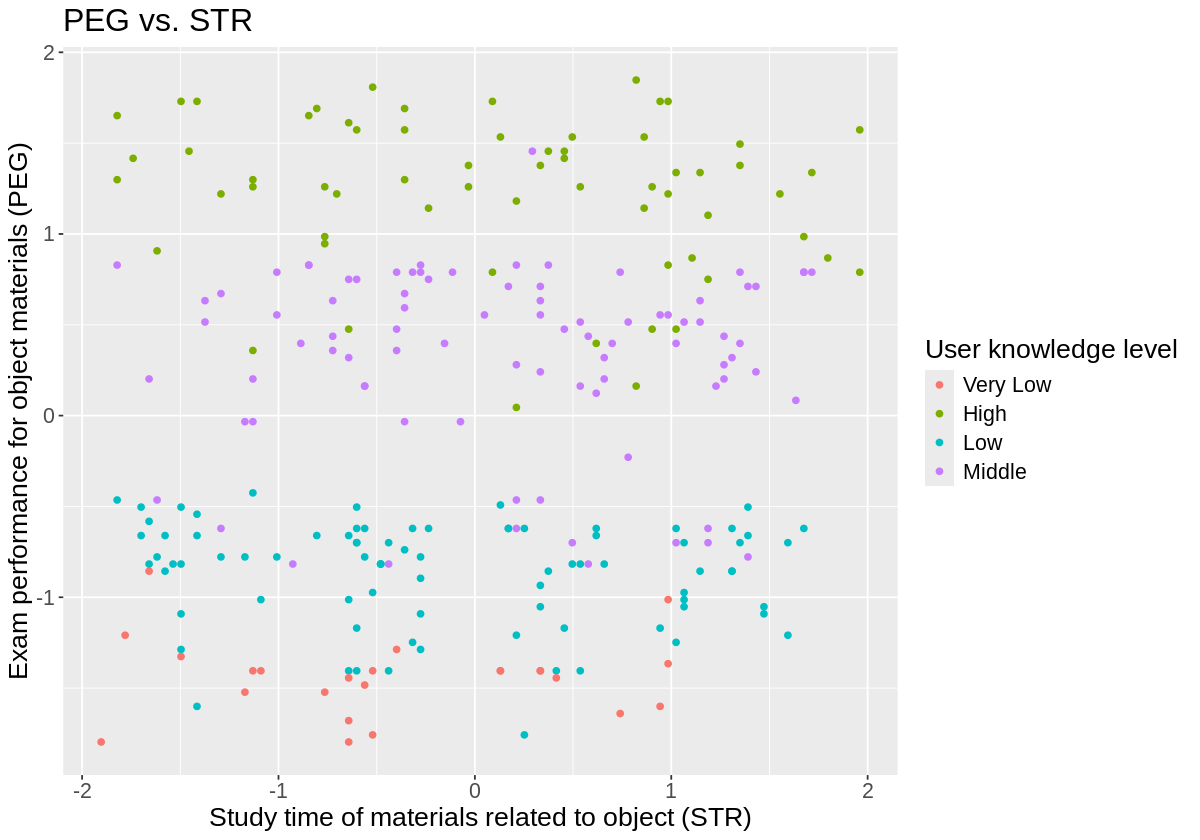

In [6]:
# scatterplot visualizing relationships of PEG, STR and UNS in the scaled training data

options(repr.plot.height = 7, repr.plot.width = 10)

ggplot(uk_train_scaled,
       aes(x = STR,
           y = PEG,
           colour = UNS)) +
    geom_point() +
    labs(x = 'Study time of materials related to object (STR)',
         y = 'Exam performance for object materials (PEG)',
         colour = 'User knowledge level',
         title = 'PEG vs. STR') +
    theme(text = element_text(size = 16))

Here we see a clear positive relationship between `UNS` and `PEG`. However, it doesn't seem to have any relation to `STR`, so it's best if we find a different second predictor.

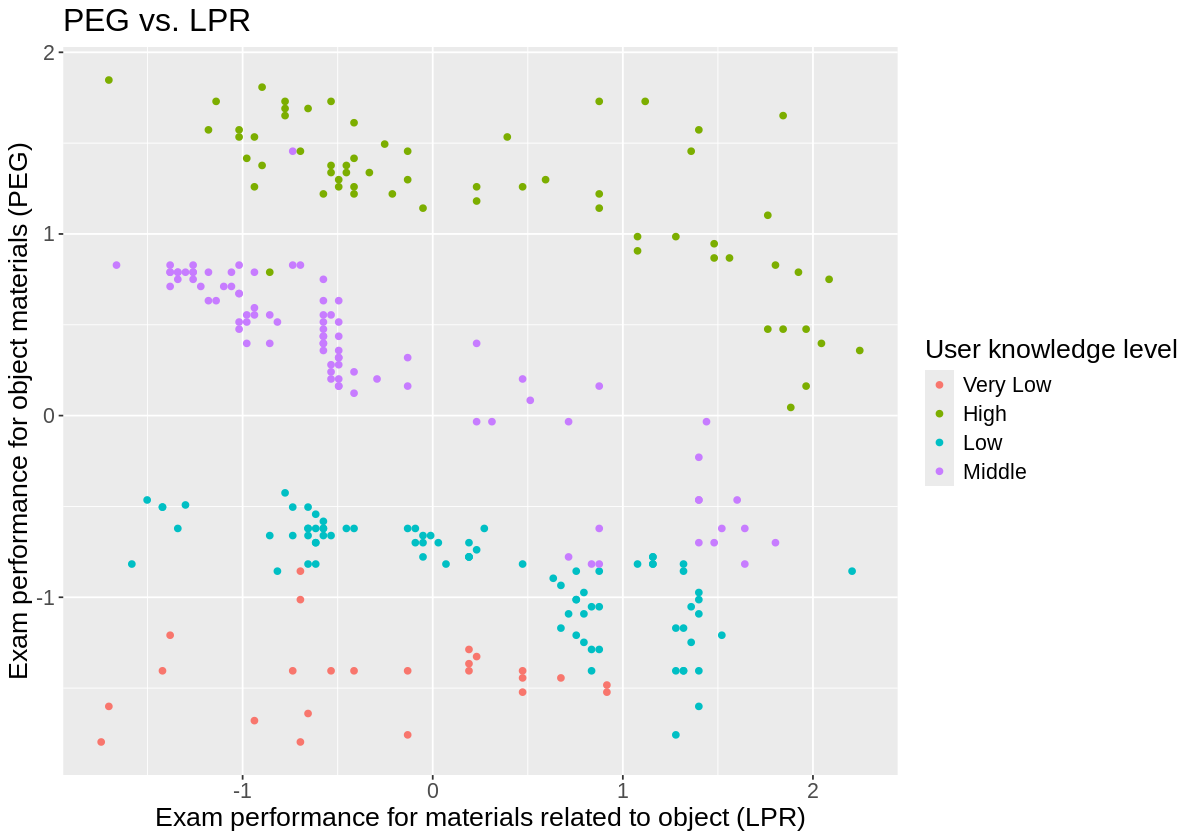

In [7]:
# scatterplot visualizing relationships of PEG, LPR and UNS in the scaled training data

options(repr.plot.height = 7, repr.plot.width = 10)

ggplot(uk_train_scaled,
       aes(x = LPR,
           y = PEG,
           colour = UNS)) +
    geom_point() +
    labs(x = 'Exam performance for materials related to object (LPR)',
         y = 'Exam performance for object materials (PEG)',
         colour = 'User knowledge level',
         title = 'PEG vs. LPR') +
    theme(text = element_text(size = 16))

This scatterplot demonstrates a stronger relationship between both axis variables and user knowledge level. So, we will be able to build a more accurate k-nearest neighbours model using PEG and LPR as predictors. We can now finish tidying our data by selecting only PEG, LPR and UNS in both datasets.

In [8]:
uk_train_scaled <- uk_train_scaled |>
    select(LPR, PEG, UNS)

uk_test_scaled <- uk_test_scaled |>
    select(LPR, PEG, UNS)

head(uk_train_scaled)
head(uk_test_scaled)

LPR        PEG        UNS     
1 -1.7440515 -1.7967053 Very Low
2 -0.7767309  1.7297900 High    
3 -0.7364259 -0.5036570 Low     
4  0.8757751 -0.6212069 Middle  
5  2.2058409 -0.8563066 Low     
6 -1.3410013  0.7893912 Middle

LPR        PEG        UNS     
1 -0.6155307 -1.4020025 Very Low
2  0.6235230 -1.0884978 Low     
3  0.6235230  1.3847057 High    
4  0.8786222  1.3847057 High    
5 -0.4697597  1.5588750 High    
6  0.2590954 -0.5311562 Low

In [9]:
# Starting out our K-NN classification alogrithm 

# Since we have read, cleaned our training data, and the dataset has already been split by
# the author themselves, there is therefore no need to use the 'inital_split' function here. 

# Before starting to build our K-NN model, let's see what the proportions of training and testing data are:

uk_proportions_training <- uk_train |>
                        group_by(UNS) |>
                        summarize(n = n()) |>
                        mutate(percent = 100*n/nrow(uk_train_scaled))

uk_proportions_training

uk_proportions_testing <- uk_test |>
                        group_by(UNS) |>
                        summarize(n = n()) |>
                        mutate(percent = 100*n/nrow(uk_test_scaled))
uk_proportions_testing

UNS      n  percent  
1 High     63 24.418605
2 Low      83 32.170543
3 Middle   88 34.108527
4 very_low 24  9.302326

UNS      n  percent 
1 High     39 26.89655
2 Low      46 31.72414
3 Middle   34 23.44828
4 Very Low 26 17.93103

In [10]:
# Looking at the results of the previous cell's code, we can see that in the training data the proportions
# of the labels aren't very similar to each other, so we will need to balance our training data.

# We are next creating a recipe that standardizes and balances our training data:

set.seed(2)

uk_recipe <- recipe(UNS ~ LPR + PEG, data = uk_train_scaled) |>
  step_upsample(UNS, over_ratio = 1, skip = FALSE) |> # Here we balance the training data
  step_impute_mean(all_predictors()) |>
  prep()

upsampled_uk_train <- bake(uk_recipe, uk_train_scaled)

upsampled_uk_train |>
  group_by(UNS) |>
  summarize(n = n())

uk_recipe_standardize <- recipe(UNS ~ LPR + PEG, data = upsampled_uk_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Since the over_ratio is 1, the count for each UNS should be the same as shown below. 
# We can see, looking below, that the count of each UNS label is 88.

UNS      n 
1 Very Low 88
2 High     88
3 Low      88
4 Middle   88

In [11]:
# Now we can make a K-NN model specification for tuning our model:

set.seed(2)

uk_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [12]:
# Next, we will perform a 5-fold cross-validation to determine 
# the optimal number of neighbors to use in our model.

# We will test k values from 1 to 15, and look at the accuracy of models using each k.

set.seed(2)

uk_vfold <- vfold_cv(upsampled_uk_train, v = 5, strata = UNS)

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

uk_fit_cross <- workflow() |>
  add_recipe(uk_recipe_standardize) |>
  add_model(uk_spec) |>
  tune_grid(resamples = uk_vfold, grid = k_vals) |>
  collect_metrics()

uk_accuracies <- uk_fit_cross |>
  filter(.metric == "accuracy")

head(uk_accuracies)

neighbors .metric  .estimator mean      n std_err    .config              
1 1         accuracy multiclass 0.9740196 5 0.01267367 Preprocessor1_Model01
2 2         accuracy multiclass 0.9740196 5 0.01267367 Preprocessor1_Model02
3 3         accuracy multiclass 0.9629085 5 0.01005798 Preprocessor1_Model03
4 4         accuracy multiclass 0.9629085 5 0.01005798 Preprocessor1_Model04
5 5         accuracy multiclass 0.9658497 5 0.01194712 Preprocessor1_Model05
6 6         accuracy multiclass 0.9658497 5 0.01194712 Preprocessor1_Model06

[1] 1

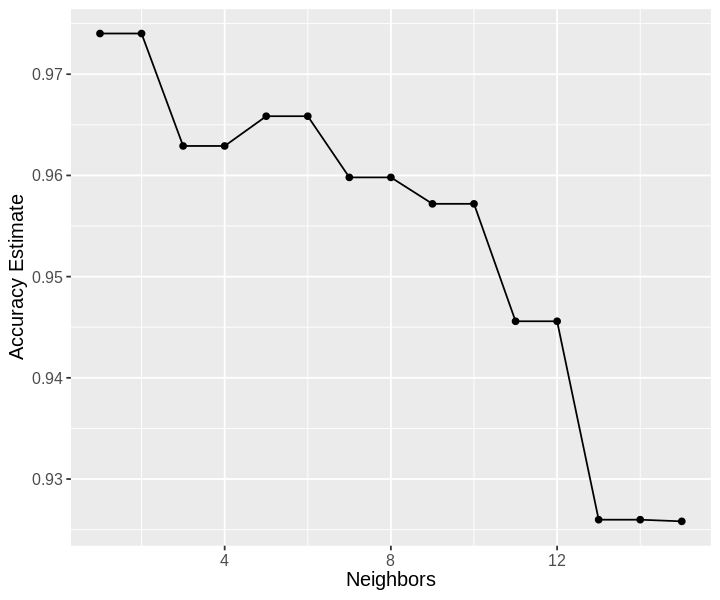

In [13]:
# Using the accuracies we obtained in the previous cell, 
# we can produce an accuracy vs. k plot and determine the best k.

set.seed(2)

options(repr.plot.height = 5, repr.plot.width = 6)
uk_accuracy_vs_k <- ggplot(uk_accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

uk_accuracy_vs_k

uk_best_k <- uk_accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
uk_best_k

In [14]:
# So, looking at the accuracy vs. k plot above, our best k is 1 neighbors. However we should not use k = 1 as it will result in overfitting 
# our data as the classification of a new observation will be based on a single nearest neighbour and potentially my lead to our model performing
# well on the training data but not on new testing data.

# Neither should we use k = 2 as we should avoid choosing an even number as our k value. This is because during our k-nn algorithm, when we want to 
# classify a new observation on a majority vote of the neighbouring classes, the likelihood of having ties occur is rather high with an even number,
# resulting in inconclusive insights from our analysis.

# Therefore, we will look at the next peak in which our best k is 5 neighbors and use this as our k value.

set.seed(2)

# Making a new specification with k = 5:
uk_spec_best_k <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

# Fitting our recipe and new spec to the training data:
uk_best_k_fit <- workflow() |>
    add_recipe(uk_recipe_standardize) |>
    add_model(uk_spec_best_k) |>
    fit(data = upsampled_uk_train)

In [15]:
# Now that we have our best k model, let's evaluate its performance.

# Predicting test data labels:
uk_test_predictions <- predict(uk_best_k_fit, uk_test_scaled) |>
    bind_cols(uk_test_scaled) |>
    mutate(.pred_class = fct_relevel(.pred_class, c('Very Low', 'Low', 'Middle', 'High'))) |>   # Here we make sure that truth and estimate
    mutate(UNS = fct_relevel(UNS, c('Very Low', 'Low', 'Middle', 'High')))                      # vectors have matching level orders so that 
                                                                                                # metrics() will work properly
# Determining prediction accuracy:
uk_knn_accuracy <- uk_test_predictions |>
    metrics(truth = UNS, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
uk_knn_accuracy

# Note that we have no positive UNS class, so we cannot calculate a precision or recall.

[1] 0.937931

In [16]:
# Looking at the cell output above, the accuracy of our model is ~94%. 
# Let's visualise this as a confusion matrix:

confusion <- uk_test_predictions |>
    conf_mat(truth = UNS, estimate = .pred_class)
confusion

          Truth
Prediction Very Low Low Middle High
  Very Low       24   1      0    0
  Low             2  39      0    0
  Middle          0   6     34    0
  High            0   0      0   39

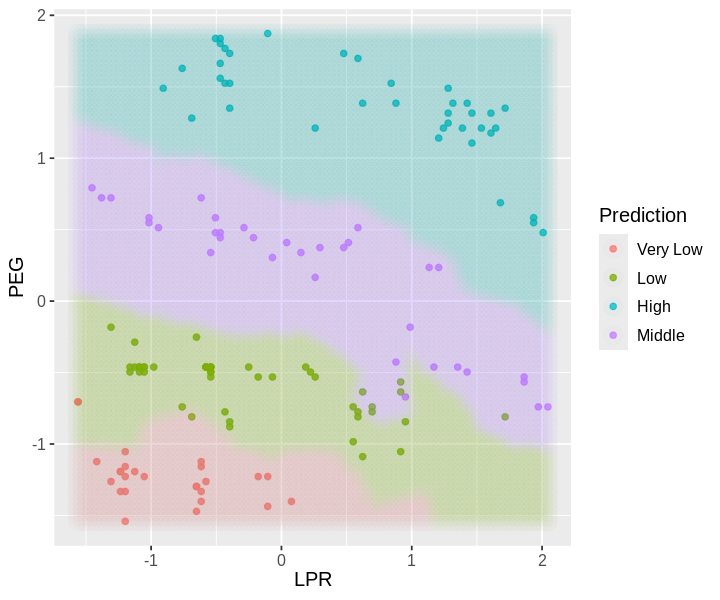

In [27]:
# We can also create a visualization that will show us where the model will predict each class. Let's try that:

# Creating a dataframe of LPR and PEG values
are_grid <- seq(min(uk_test_scaled$LPR),
                max(uk_test_scaled$LPR),
                length.out = 100)
smo_grid <- seq(min(uk_test_scaled$PEG),
                max(uk_test_scaled$PEG),
                length.out = 100)
asgrid <- as_tibble(expand.grid(LPR = are_grid,
                                PEG = smo_grid))

# Making predictions at the grid points and binding them as a column with grid points
knnPredGrid <- predict(uk_best_k_fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) |>
    rename(Class = .pred_class)

# Creating the plot
wkflw_plot <- ggplot() +
    geom_point(data = uk_test_scaled, # This part plots the test data colored scatter
               mapping = aes(x = LPR,
                             y = PEG,
                             color = UNS),
               alpha = 0.75) +
    geom_point(data = prediction_table, # This plots the colour of predicted classes
               mapping = aes(x = LPR,
                             y = PEG,
                             color = Class),
               alpha = 0.02,
               size = 5) +
    labs(color = "Prediction",
         x = "LPR",
         y = "PEG") +
    theme(text = element_text(size = 12))

wkflw_plot

##### NOT DONE! #####

## Discussion

In this project, we created a classification model that uses the variable ***PEG***, the exam performance of the user for goal objects (knowledge of Electrical DC Machines), and variable ***LPR***, the exam performance of the user for related objects (knowledge of subjects related to Electrical DC Machines) with the goal object in the data set to predict ***UNS***, the knowledge level on Electrical DC Machines of the user.

We used trial and error to test which variables out of all in the data set showed the strongest relationship with UNS. After creating scatterplots testing multiple variables like ***SCG*** (The degree of repetition number of user for goal object materials) and ***STG*** (​​The degree of study time for goal object materials) as predictors for ***UNS***, then ***PEG*** (Exam performance of the user on goal objects) and ***STR*** (The degree of study time of user for related objects with goal object), we finally concluded that the variables that showed the strongest relationship with ***UNS*** were ***PEG*** and ***LPR***. Thus, we decided to build a ***K-NN classification model that used PEG and LPR as predictor variables for UNS***. 

The PEG, LPR and UNS scatterplot showed that as the value of the predictor variables increases, the UNS does too. This was consistent with our prediction that PEG and LPR would have a strong, positive, linear correlation with UNS. Our classification model was built keeping this relationship in mind. 

We used accuracy as our evaluation metric for our K-NN model. To perform this evaluation, we conducted a 5-fold cross-validation and determined that the optimal value of k for our classification model is ***k=5***. We used this value of k to evaluate our model’s performance on the testing data set and found that it gave us results with ***~94% accuracy***.

As per the confusion matrix, our model was able to predict “Very Low” and “High” UNS with no errors and “Low” and “Middle” UNS with minimal errors. We believe this happened because our model was accurate enough to classify extreme values of the UNS without any error, but faltered when it came to relatively average values.

With the help of this model, we can gain insights into what to focus on when developing curricula related to Electrical DC machinery. Our model predicts with a 94% accuracy that doing well on exams on the topic itself as well as topics related to Electrical DC machinery can result in a high level of user knowledge of the same. This information can be put to use and educators can incorporate more and more exams into their programs to improve overall knowledge related to the topic.

Two research questions this could lead to are – 
1. To what extent does the study time of related subject areas affect the exam performance of our target study area?
2. Do exam performance on goal objects and exam performance on related goal objects (our predictor variables) influence each other?


## References

Agarwal, T. (2020, October 31). What is a DC Machine : Construction & Its Working. ElProCus. https://www.elprocus.com/dc-machine-types-and-their-applications/ 

Kahraman, H., Colak, I., & Sagiroglu, S. (2013). User Knowledge Modeling. UCI Machine Learning Repository. https://doi.org/10.24432/C5231X.

Timbers, T., Campbell, T., & Lee, M. (2023, December 23). Data Science, A First Introduction. https://datasciencebook.ca/